In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

%load_ext autoreload
%autoreload 2

# **Load the training data**

In [2]:
import datetime
from implementations import *

data, pred, ids = load_data("train.csv")
for i in range(data.shape[1]):
    data[:][i] = standardize(data[:][i])[0]
y, tx = build_model_data(data, pred)

## Ridge regression using normal equations

Here we train our model using Ridge Regression

In [19]:
accuracy_RR = []
maxAccuracy = 0
lambda_values = np.arange(0, 3, 0.01)

start_time = datetime.datetime.now()

for i in lambda_values:
    w = ridge_regression(y, tx, i)
    
    actual_pred = np.dot(tx, w)
    actual_pred = (actual_pred > 0.5).astype(float)
    correctly_classified = np.sum(actual_pred == pred)
    accuracy = correctly_classified / len(pred)
    
    if maxAccuracy < accuracy :
        maxAccuracy = accuracy
        best_lambda = i
    
    accuracy_RR.append(accuracy)

end_time = datetime.datetime.now()

Execution time 4.277506 seconds
The best accuracy in Ridge Regression is obtained for lambda = 0.00 at 0.74496


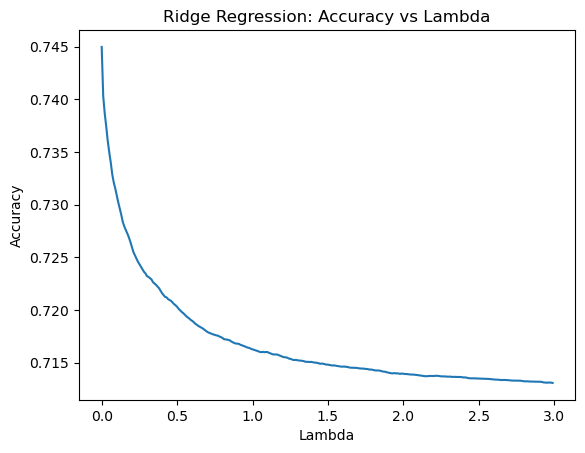

In [20]:
plt.plot(lambda_values, accuracy_RR)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Ridge Regression: Accuracy vs Lambda')

print(f"Execution time {(end_time - start_time).total_seconds()} seconds")
print("The best accuracy in Ridge Regression is obtained for lambda =", format(best_lambda, '.2f'), "at", maxAccuracy)
